In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
DATA_DIR = '/tf/Capstone Project/project-1/Data/From PDF/' #Local Docker image
DATA_DIR = '/content/drive/MyDrive/Societe General/Data Science Course/Capstone Project/Project-1/Data/From PDF'

In [3]:
!pip install pingouin

In [4]:
import os
os.chdir(DATA_DIR)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
import pingouin as pg
color = sns.color_palette()
from pandas.plotting import table
import scipy
from scipy.stats import pearsonr, spearmanr
from wordcloud import WordCloud, STOPWORDS
import datetime as dt
import plotly
import cufflinks as cf
import plotly.offline
!pwd

/content/drive/MyDrive/Societe General/Data Science Course/Capstone Project/Project-1/Data/From PDF


In [5]:
# essays_raw = pd.read_csv('essay_sample-1.csv', index_col = 'projectid')
# outcomes_raw = pd.read_csv('outcomes_sample.csv', index_col = 'projectid')
# projects_raw = pd.read_csv('projects_sample.csv', index_col = 'projectid')
projects_raw = pd.read_csv('projects.csv')

In [6]:
def shape_df(df):
    print(f"Number of observations: {df.shape[0]}")
    print(f"Number of variables: {df.shape[1]}")
    print(f"Number of duplicates: {df.duplicated().sum()}")
    print(f"Are there any missing values {df.isnull().values.any()}")
    print("-----")
    print(df.dtypes.sort_values(ascending=True))
    print("------")
    print("Datatypes' proportion:")
    print(df.dtypes.value_counts(ascending=True))

In [7]:
def null_val(df):
    detect_null_val = df.isnull().values.any()
    if detect_null_val:
        null_abs = df.isnull().sum()
        null_pc = df.isnull().sum() / df.isnull().shape[0] *100
        null_concat = pd.concat([null_abs,null_pc], axis=1).round(2)
        null_concat.columns = ['Absolute', 'Percent']
        return null_concat.sort_values(by="Absolute", ascending=False)
    else:
        print("There are no missing values.")

In [8]:
def corrs(x):
    mask = np.triu(x.corr(), 1)
    plt.figure(figsize=(19, 9))
    return sns.heatmap(x.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [9]:
def unique_counts(df, thresh = 15):
    for column in df.columns:
        if df[column].nunique() < thresh:
            print(df.groupby([column], dropna = False).size(), '\n\n')

## Projects File Processing

- projectid - project's unique identifier 
- teacher_acctid - teacher's unique identifier (teacher that created a project) 
- schoolid - school's unique identifier (school where teacher works)
- school_ncesid - public National Center for Ed Statistics id 
- school_latitude school_longitude school_city school_state school_zip school_metro school_district school_county  - Address
- school_charter - whether a public charter school or not (no private schools in the dataset) 
- school_magnet - whether a public magnet school or not 
- school_year_round - whether a public year round school or not 
- school_nlns - whether a public nlns school or not 
- school_kipp - whether a public kipp school or not 
- school_charter_ready_promise - whether a public ready promise school or not 
- teacher_prefix - teacher's gender 
- teacher_teach_for_america - Teach for America or not 
- teacher_ny_teaching_fellow - New York teaching fellow or not 
- primary_focus_subject - main subject for which project materials are intended 
- primary_focus_area - main subject area for which project materials are intended 
- secondary_focus_subject - secondary subject 
- secondary_focus_area - secondary subject 
- area resource_type - main type of resources requested by a project 
- poverty_level -school's poverty level. highest: 65%+ free of reduced lunch high: 40-64% moderate: 10-39% low: 0-9% 
- grade_level - grade level for which project materials are intended 
- fulfillment_labor_materials - cost of fulfillment 
- total_price_excluding_optional_support - project cost excluding optional tip that donors give to DonorsChoose.org while funding a project 
- total_price_including_optional_support - project cost including optional tip that donors give to DonorsChoose.org while funding a project 
- students_reached - number of students impacted by a project (if funded) 
- eligible_double_your_impact_match - project was eligible for a 50% off offer by a corporate partner (logo appears on a project, like Starbucks or Disney) 
- eligible_almost_home_match - project was eligible for a $100 boost offer by a corporate partner 
- date_posted - date a project went live on the site 

In [10]:
shape_df(projects_raw)

Number of observations: 664098
Number of variables: 35
Number of duplicates: 0
Are there any missing values True
-----
fulfillment_labor_materials               float64
students_reached                          float64
school_ncesid                             float64
school_latitude                           float64
school_longitude                          float64
total_price_including_optional_support    float64
total_price_excluding_optional_support    float64
school_zip                                float64
primary_focus_subject                      object
primary_focus_area                         object
secondary_focus_subject                    object
secondary_focus_area                       object
projectid                                  object
poverty_level                              object
grade_level                                object
teacher_ny_teaching_fellow                 object
eligible_double_your_impact_match          object
resource_type                  

In [11]:
null_val(projects_raw)

,Absolute,Percent
secondary_focus_subject,207893,31.30
secondary_focus_area,207893,31.30
school_metro,81908,12.33
school_ncesid,42736,6.44
fulfillment_labor_materials,35082,5.28
school_district,948,0.14
students_reached,146,0.02
resource_type,45,0.01
primary_focus_subject,39,0.01
primary_focus_area,39,0.01


In [12]:
projects_raw.describe().round(2)

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,6.213620e+05,664098.00,664098.00,664094.00,629016.00,664098.00,664098.00,663952.00
mean,2.608577e+11,37.24,-93.34,52926.45,27.50,542.04,644.71,97.23
std,1.589754e+11,4.67,17.76,31193.74,8.66,12677.38,15458.63,2283.33
min,1.000050e+10,18.25,-176.63,410.00,9.00,0.00,0.00,0.00
25%,1.000230e+11,34.04,-112.00,27589.00,17.00,267.20,317.50,22.00
50%,2.615730e+11,37.66,-87.68,50702.00,30.00,411.00,487.84,30.00
75%,3.704720e+11,40.76,-79.19,85043.00,35.00,586.49,696.39,100.00
max,6.100009e+11,67.26,-66.63,99950.00,35.00,10250017.00,12500020.73,999999.00


For total_price_including_optimal_support & total_price_excluding_optimal_support. 
The median and mean vary a lot and the max is very huge. Hence some data points have to be dropped for better analysis.

In [13]:
projects_raw.describe(include = "object")

,projectid,teacher_acctid,schoolid,school_city,school_state,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
count,664098,664098,664098,664098,664098,582190,663150,664081,664098,664098,664098,664098,664098,664098,664094,664098,664098,664059,664059,456205,456205,664053,664098,664089,664098,664098,664098
unique,664098,249555,57004,9007,52,3,9246,1702,2,2,2,2,2,2,5,2,2,27,7,27,7,6,4,4,2,2,4026
top,4c74bd6f1938a633d00d8b0dae7d0859,787720cc575e3204991b8ca18d312d2b,9231edfbd3aa42675e70e69aea8b0a36,Chicago,CA,urban,New York City Dept Of Ed,Los Angeles,f,f,f,f,f,f,Mrs.,f,f,Literacy,Literacy & Language,Literature & Writing,Literacy & Language,Supplies,highest poverty,Grades PreK-2,f,f,2012-09-30
freq,1,266,944,28435,126242,349703,55710,50223,606501,601828,631067,654157,659704,660844,316590,626349,652660,201378,298758,69603,162525,229213,383489,246118,485746,626060,1490


In [14]:
unique_counts(projects_raw)

school_metro
rural        80253
suburban    152234
urban       349703
NaN          81908
dtype: int64 


school_charter
f    606501
t     57597
dtype: int64 


school_magnet
f    601828
t     62270
dtype: int64 


school_year_round
f    631067
t     33031
dtype: int64 


school_nlns
f    654157
t      9941
dtype: int64 


school_kipp
f    659704
t      4394
dtype: int64 


school_charter_ready_promise
f    660844
t      3254
dtype: int64 


teacher_prefix
Dr.               12
Mr.            84968
Mr. & Mrs.         2
Mrs.          316590
Ms.           262522
NaN                4
dtype: int64 


teacher_teach_for_america
f    626349
t     37749
dtype: int64 


teacher_ny_teaching_fellow
f    652660
t     11438
dtype: int64 


primary_focus_area
Applied Learning        49534
Health & Sports         18445
History & Civics        31131
Literacy & Language    298758
Math & Science         164339
Music & The Arts        59893
Special Needs           41959
NaN                        39
dtype:

In [20]:
null_val(projects)

,Absolute,Percent
fulfillment_labor_materials,35082,5.28
students_reached,129,0.02
projectid,0,0.00
resource_type,0,0.00
teacher_ny_teaching_fellow,0,0.00
primary_focus_subject,0,0.00
primary_focus_area,0,0.00
secondary_focus_subject,0,0.00
secondary_focus_area,0,0.00
grade_level,0,0.00


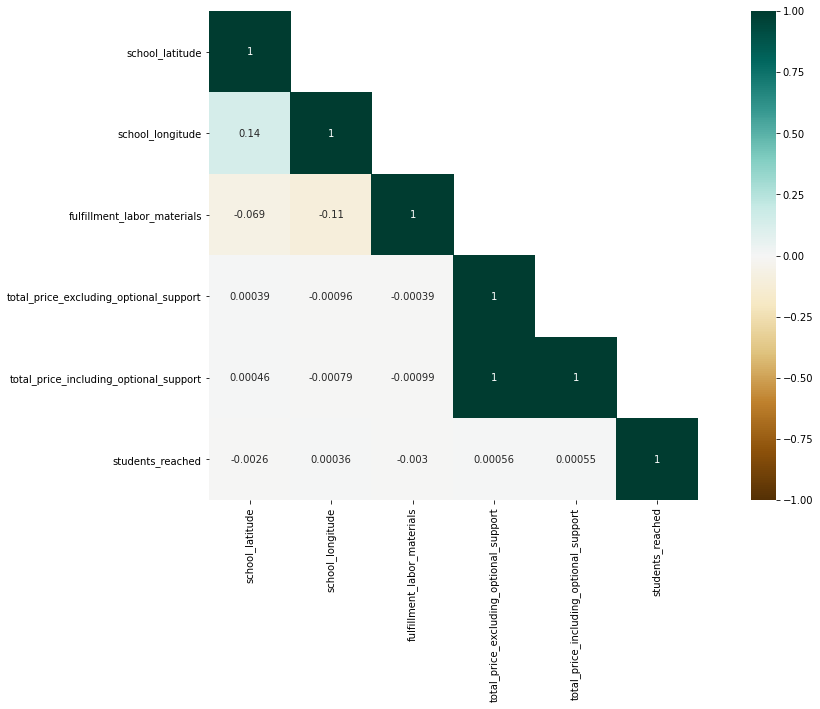

In [21]:
corrs(projects)

,Mrs.,Ms.,Mr.,Dr.,NA,Mr. & Mrs.
teacher_prefix,316567.00,262511.00,84958.00,12.00,4.00,2.00
percent,47.67,39.53,12.79,0.00,0.00,0.00
cumsum,47.67,87.20,99.99,99.99,99.99,99.99


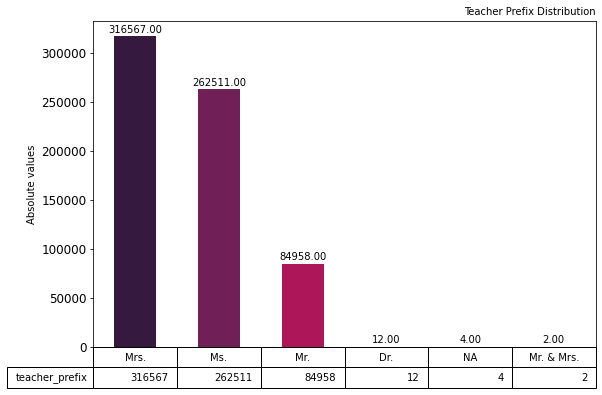

In [22]:
df_teacher = projects[["teacher_acctid","teacher_prefix"]].copy()

# Bar plot
ax = df_teacher["teacher_prefix"].value_counts().plot(kind="bar", figsize=(9,6), fontsize=12, color=sns.color_palette("rocket"), table=True)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.xlabel("teacher_prefix", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute values", fontsize=10)
plt.title("Teacher Prefix Distribution", fontsize=10, loc="right")
# side table
sidetb = df_teacher.teacher_prefix.value_counts().sort_values(ascending=False).to_frame()
sidetb["percent"] = (sidetb.apply(lambda x: x/x.sum())*100).round(2)
sidetb['cumsum'] = sidetb["percent"].cumsum()
display(sidetb.T)
ax.axes.get_xaxis().set_visible(False)
table = ax.tables[0]
table.set_fontsize(10)
table.scale(1,1.7)

In [26]:
projects["date_posted"] = pd.to_datetime(projects["date_posted"], format="%Y-%m-%d")
projects["year_posted"] = projects["date_posted"].dt.year
projects["month_posted"] = projects["date_posted"].dt.month.map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dez"})
projects["month_day_posted"] = projects["date_posted"].dt.day
projects["weekday_posted"] = projects["date_posted"].dt.dayofweek.map({0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"})
projects[["date_posted","year_posted","month_posted","weekday_posted", "month_day_posted"]]

,date_posted,year_posted,month_posted,weekday_posted,month_day_posted
0,2014-05-12,2014,May,Mon,12
1,2014-05-12,2014,May,Mon,12
2,2014-05-11,2014,May,Sun,11
3,2014-05-11,2014,May,Sun,11
4,2014-05-11,2014,May,Sun,11
...,...,...,...,...,...
664093,2002-09-17,2002,Sep,Tue,17
664094,2002-09-17,2002,Sep,Tue,17
664095,2002-09-16,2002,Sep,Mon,16
664096,2002-09-13,2002,Sep,Fri,13


,Sun,Sat,Tue,Mon,Fri,Wed,Thu
weekday_posted,131620.00,94685.00,93271.00,91964.00,85732.00,83872.00,82910.00
percent,19.82,14.26,14.05,13.85,12.91,12.63,12.49
cumsum,19.82,34.08,48.13,61.98,74.89,87.52,100.01


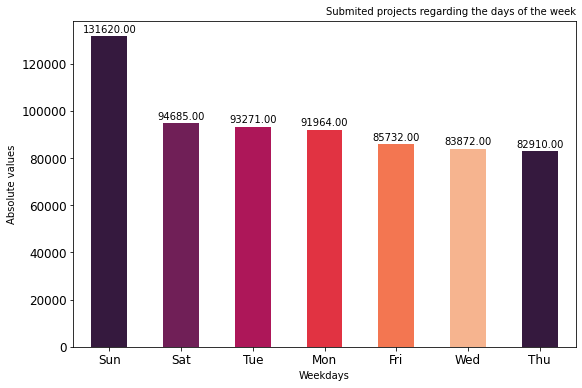

In [27]:
df_timedate = projects[["teacher_acctid","teacher_prefix","year_posted","month_posted","weekday_posted","date_posted"]].copy()
# Bar plot
ax = df_timedate["weekday_posted"].value_counts().plot(kind="bar", figsize=(9,6), fontsize=12, color=sns.color_palette("rocket"), table=False)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')
plt.xlabel("Weekdays", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute values", fontsize=10)
plt.title("Submited projects regarding the days of the week", fontsize=10, loc="right")
# side table
daysofweek = df_timedate.weekday_posted.value_counts().sort_values(ascending=False).to_frame()
daysofweek["percent"] = (daysofweek.apply(lambda x: x/x.sum())*100).round(2)
daysofweek['cumsum'] = daysofweek["percent"].cumsum()
display(daysofweek.T)

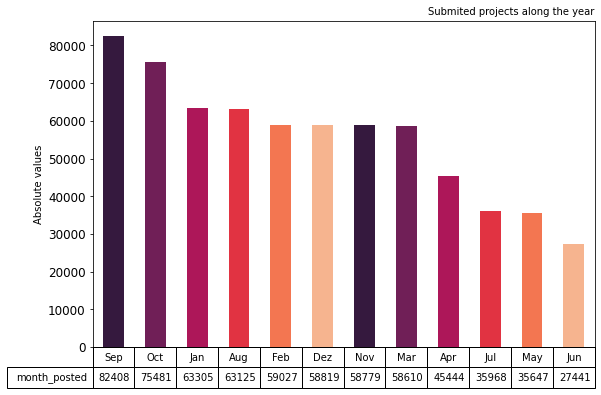

In [28]:
# Checking distribution of submited projects along the academic year
# Bar plot
ax = df_timedate["month_posted"].value_counts().plot(kind="bar", figsize=(9,6), fontsize=12, color=sns.color_palette("rocket"), table=True)
plt.xlabel("Months", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute values", fontsize=10)
plt.title("Submited projects along the year", fontsize=10,loc="right")
ax.axes.get_xaxis().set_visible(False)
table = ax.tables[0]
table.set_fontsize(10)
table.scale(1,1.7)

In [33]:
df_timedate[df_timedate["year_posted"]==2014].month_posted.unique()

array(['May', 'Apr', 'Mar', 'Feb', 'Jan'], dtype=object)

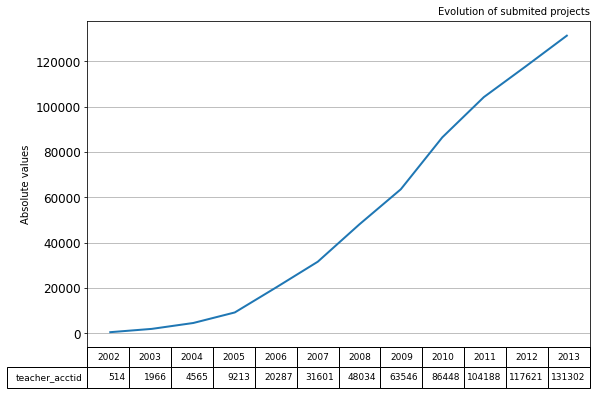

In [32]:
# Checking evolution from 2002 to 2013
# Bar plot
ax = df_timedate.groupby("year_posted")['teacher_acctid'].count()[:-1].plot(kind="line", figsize=(9,6), fontsize=12, linewidth=2, grid=True, table=True)
plt.xlabel("Years", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute values", fontsize=10)
plt.title("Evolution of submited projects", fontsize=10,loc="right")
ax.axes.get_xaxis().set_visible(False)
table = ax.tables[0]
table.set_fontsize(10)
table.scale(1,1.7)

In [29]:
print(projects_raw.shape)
print(projects.shape)

(664098, 35)
(664054, 39)


In [34]:
schools_ = projects[["school_metro", "school_state", "school_city", "resource_type", "grade_level", "poverty_level", "year_posted"]].copy()
schools_.head()

,school_metro,school_state,school_city,resource_type,grade_level,poverty_level,year_posted
0,NA,CA,Selma,Books,Grades 6-8,highest poverty,2014
1,urban,TX,Dallas,Books,Grades PreK-2,highest poverty,2014
2,rural,OR,Colton,Technology,Grades PreK-2,high poverty,2014
3,urban,NY,Brooklyn,Books,Grades 3-5,highest poverty,2014
4,urban,CA,Los Angeles,Other,Grades PreK-2,highest poverty,2014


In [ ]:
# Checking feature "school_metro" regarding school located areas
# Replacing np.nan values by ""unknown"
schools_.school_metro.replace(np.nan, "Unkown", inplace=True)
---
# Bar plot
ax = schools_.school_metro.value_counts().plot(kind="pie", figsize=(9,6), autopct='%1.2f%%', explode= (0.005, 0.005, 0.005, 0.005), startangle=80, fontsize=12, table=True)
# Params
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("", fontsize=10)
plt.title("Metropolitan school areas", fontsize=10,loc="right")
ax.axes.get_xaxis().set_visible(False)
table = ax.tables[0]
table.set_fontsize(10)
table.scale(1,1.7)

## Pre-Processing

In [35]:
#Keeping Original data safe
projects = projects_raw.copy()

### Handling Null values

<h4>Null Value Handling Methods</h4>

- teacher_prefix -- Insertng 'NA'
- school_zip -- Trying to insert from another row with same school_ncesid and then Inserting 'NA'
- grade_level -- Removing data points with no grade_level
- school_country -- Similar to school zip and then Inserting 'NA'
- primary_focus_area -- Removing data points with no Primary focus
- primary_focus_subject -- Removing data points wiht no Primary focus
- resource_type -- Inserting 'Others'
- students_reached -- Similar to school zip and then inserting 'NA'
- school_district -- Similar to school zip and then inserting 'NA'
- fullfillment_labor_materials -- //Decide later
- school_ncesid -- Ignoring (Column might not be used later)
- school_metro -- Imputing with other location details and taking the info
- secondary_focus_area -- Inserting 'Not available'
- Secondary_focus_subject -- Inserting 'Not available'

In [16]:
def insert_null_values_using_other_columns(df, column_to_fill, base_columns, default_value):
    #Breaking condition
    if (len(base_columns) ==0 ):
        df[column_to_fill] = df[column_to_fill].fillna(default_value)
        return
    
    def find_similar_single_column(row, curr_input_column = base_columns[0]):
        value = row[curr_input_column]
        if(value == 'NA'):
            return None
        all_rows = df.loc[(df[curr_input_column] == value) 
                          & (df[column_to_fill].notnull())]
        if(all_rows.shape[0] > 0):
            new_row = all_rows.iloc[0]
            return new_row[column_to_fill]  
        else:
            return None
    
    curr_input_columns = base_columns[0]
    if isinstance(curr_input_columns, list):
        print('Fix later')
    elif isinstance(curr_input_columns, str):
        df[column_to_fill] = df.apply(
            lambda row: find_similar_single_column(row) if row[column_to_fill] == None else row[column_to_fill],
            axis = 1)
    else:
        print('Wrong structure ')
        return
    if(df[column_to_fill].isna().sum() != 0):
        #Recursive call
        insert_null_values_using_other_columns(df, column_to_fill, base_columns[1:], default_value)
    
    return

In [17]:
insert_null_values_using_other_columns(
    projects,
    'school_ncesid',
    ['schoolid', 'teacher_acctid'],
    'NA'
)

insert_null_values_using_other_columns(
    projects,
    'school_zip',
    ['schoolid', 'school_ncesid', 'school_city', 'teacher_acctid'],
    'NA'
)

insert_null_values_using_other_columns(
    projects,
    'school_district',
    ['schoolid','school_zip', 'school_ncesid', 'school_city', 'teacher_acctid'],
    'NA'
)

insert_null_values_using_other_columns(
    projects,
    'school_metro',
    ['schoolid', 'school_ncesid', 'school_city', 'school_zip' ],
    'NA'
)

insert_null_values_using_other_columns(
    projects,
    'school_county',
    ['schoolid', 'school_ncesid', 'school_zip' ],
    'NA'
)


In [18]:
columns_filling_with_na = ['teacher_prefix', 'secondary_focus_subject', 'secondary_focus_area']
for column in columns_filling_with_na:
    projects[column] = projects[column].fillna('NA')

projects['resource_type'] = projects['resource_type'].fillna('Other')

In [19]:
columns_dropping_if_null = ['primary_focus_area', 'primary_focus_subject', 'grade_level']
projects = projects.dropna(subset = columns_dropping_if_null, axis = 0)

projects = projects.dropna(subset = ['resource_type'], axis = 0)

In [24]:
shape_df(essays_raw)

NameError: ignored

In [ ]:
essays_raw.head()

- projectid - unique project identifier 
- teacher_acctid - teacher id that created a project 
- title - title of the project 
- short_description - description of a project
- need_statement - need statement of a project 
- essay - complete project essay 

In [ ]:
print_basic_details_of_data_set(outcomes_raw, 'Outcomes')

In [ ]:
outcomes_raw.head()

- is_exciting - ground truth of whether a project is exciting from business perspective (target variable, model for exciting projects) 
- at_least_1_teacher_referred_donor - teacher referred = donor donated because teacher shared a link or publicized their page 
- fully_funded - project was successfully completed 
- at_least_1_green_donation - a green donation is a donation made with credit card, PayPal, Amazon or check 
- great_chat - project has a comment thread with greater than average unique comments 
- three_or_more_non_teacher_referred_donors - non-teacher referred is a donor that landed on the site by means other than a teacher referral link/page 
- one_non_teacher_referred_donor_giving_100_plus - see above 
- donation_from_thoughtful_donor - a curated list of ~15 donors that are power donors and picky choosers (we trust them selecting great projects) 
- great_messages_proportion - how great_chat is calculated. proportion of comments on the project page that are unique. If > avg (currently 62%) then great_chat = True 
- teacher_referred_count - number of donors that were teacher referred (see above) 
- non_teacher_referred_count - number of donors that were non-teacher referred (see above) 